# Linear Regression in Machine Learning

---

## 1. What is Linear Regression?

Linear Regression is one of the most fundamental and widely used algorithms in machine learning and statistics. It models the **linear relationship** between **input variables (independent variables)** and **output variables (dependent variables)**. The goal is to predict values or analyze relationships between variables.

---

## 2. Objective of Linear Regression

Linear Regression aims to find the **best-fitting line** that describes the relationship between input and output data. This line allows us to make predictions about the output variable for given input variables.

---

## 3. Linear Equation

Linear Regression is based on the following mathematical model:

$y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$

- $y$: Output (Predicted Value)  
- $x_i$: Input variables  
- $w_i$: Weights (Coefficients) of the input variables  
- $b$: Intercept (Bias term)  

---

## 4. Types of Linear Regression

1. **Simple Linear Regression**:  
   - Involves one independent variable ($x$) and one dependent variable ($y$).  
   - Example: Predicting house price based on its size.  

   $y = w_1x + b$

2. **Multiple Linear Regression**:  
   - Involves multiple independent variables ($x_1, x_2, ..., x_n$) and one dependent variable ($y$).  
   - Example: Predicting house price based on size, location, and number of rooms.  

   $y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$

---

## 5. How Linear Regression Works

1. **Training Process**:  
   - Linear Regression learns the values of $w_i$ and $b$ by minimizing the error between predicted values and actual values.  

2. **Loss Function**:  
   - Linear Regression typically uses **Mean Squared Error (MSE)** to measure the error:  
     $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$
     - $y_i$: Actual value  
     - $\hat{y}_i$: Predicted value  
     - $n$: Number of data points  

3. **Optimization**:  
   - Uses methods like **Gradient Descent** to minimize the loss function and find the best values for $w_i$ and $b$.  

---

## 6. Assumptions of Linear Regression

Linear Regression works well under the following assumptions:  
1. **Linearity**: The relationship between input and output variables is linear.  
2. **Independence**: The input variables are independent of each other.  
3. **Homoscedasticity**: The variance of residuals is constant.  
4. **Normality**: Residuals are normally distributed.  

---

## 7. Advantages of Linear Regression

1. **Simplicity**: Easy to implement and interpret.  
2. **Efficiency**: Computationally lightweight, making it suitable for large datasets.  
3. **Explainability**: Results are easy to understand and explain.  


In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

## 1. Simple Linear Regression

In [42]:
# Load Advertising Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

# Select independent (X) and dependent (y) variables
X = df[['TV']].values  # TV advertising budget
y = df['sales'].values  # Sales revenue

In [43]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [44]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Weight (w): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Mean Squared Error: 10.20
Weight (w): 0.05
Intercept (b): 7.12


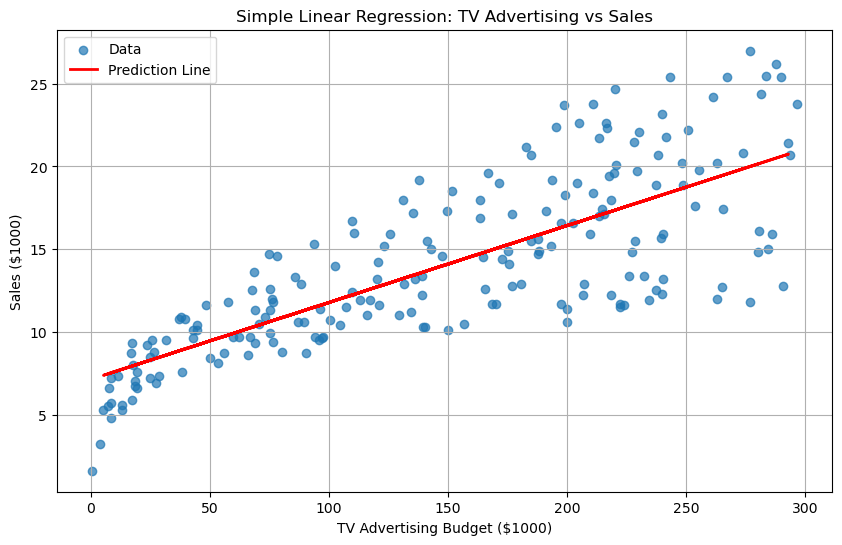

In [45]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Line')
plt.title('Simple Linear Regression: TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget ($1000)')
plt.ylabel('Sales ($1000)')
plt.legend()
plt.grid()
plt.show()

## 2. Multiple Linear Regression

### 2.1 Example: Predicting Insurance Charges Using Demographic and Health Factors
This dataset contains demographic, health, and lifestyle information about individuals and the corresponding insurance charges. It is commonly used to study and predict insurance premiums based on various factors.

| Column Name  | Description                                        | Type         |
|--------------|----------------------------------------------------|--------------|
| age          | Age of the individual                             | Numerical    |
| sex          | Gender of the individual (`male` or `female`)     | Categorical  |
| bmi          | Body Mass Index (BMI)                             | Numerical    |
| children     | Number of children/dependents covered by insurance| Numerical    |
| smoker       | Smoker status (`yes` or `no`)                     | Categorical  |
| region       | Region of residence (`northeast`, `southeast`, etc.) | Categorical |
| charges      | Insurance premium charged (target variable)       | Numerical    |


In [5]:
# Generate synthetic data
url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [10]:
# Train-test split
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Intercept: {model.intercept_} \n")
display(pd.Series(model.coef_ , index = X.columns))

Mean Squared Error (MSE): 32318403.82
R-squared (R2): 0.79
Intercept: -11576.99997611236 



age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

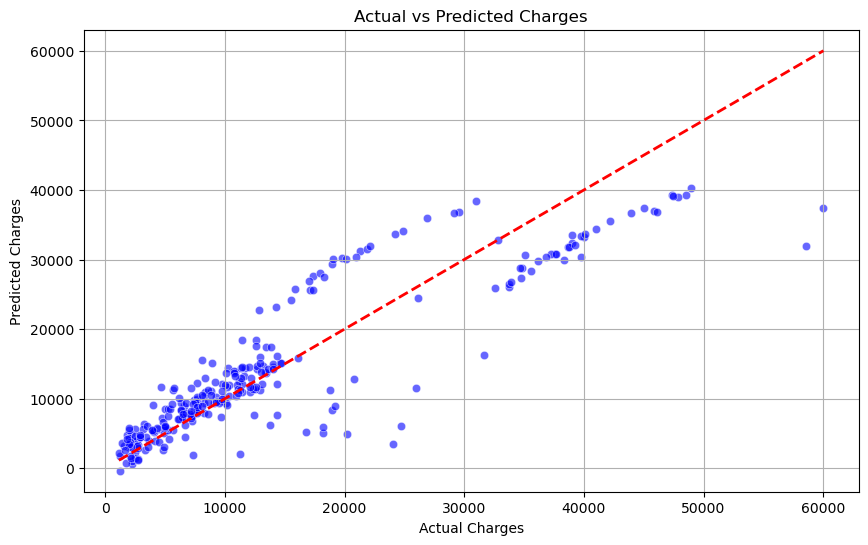

In [20]:
# Visualization
# Scatter plot for actual vs predicted

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # Ideal line
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

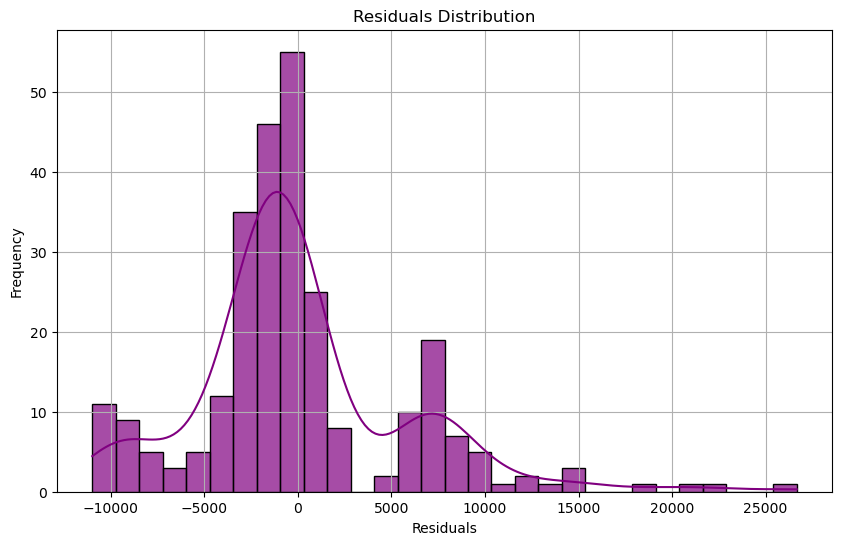

In [22]:
# Residuals plot
# Histogram of residuals

residuals = y_test - pred
plt.figure(figsize=(10, 6))

sns.histplot(residuals, kde=True, bins=30, color='purple', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 2.2 Example: Predicting Automobile MPG Based on Vehicle Features
The MPG (Miles Per Gallon) dataset includes information about various automobiles, primarily focusing on their fuel efficiency (MPG). It is widely used to study the relationship between vehicle characteristics and fuel efficiency.

| Column Name  | Description                                        | Type         |
|--------------|----------------------------------------------------|--------------|
| mpg          | Miles per gallon (fuel efficiency, target variable)| Numerical    |
| cylinders    | Number of cylinders in the engine                 | Numerical    |
| displacement | Engine displacement in cubic inches               | Numerical    |
| horsepower   | Horsepower of the vehicle                         | Numerical    |
| weight       | Weight of the vehicle in pounds                   | Numerical    |
| acceleration | Time taken to accelerate from 0 to 60 mph (seconds)| Numerical    |
| model_year   | Year of manufacture                               | Numerical    |
| origin       | Origin of the vehicle (`1` = USA, `2` = Europe, `3` = Asia) | Categorical |
| name         | Model name of the car                             | Categorical  |


In [33]:
# Load the automobile fuel efficiency dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(url)

# Data preprocessing: Remove missing values
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [34]:
# Define independent variables and dependent variable
X = df[['cylinders', 'horsepower', 'weight', 'acceleration']]  # Independent variables
y = df['mpg']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-0.39031014 -0.05185067 -0.00524434 -0.05025754]
Intercept: 47.60395214007469
Mean Squared Error: 17.701621316193812
R-squared: 0.6531853636349534


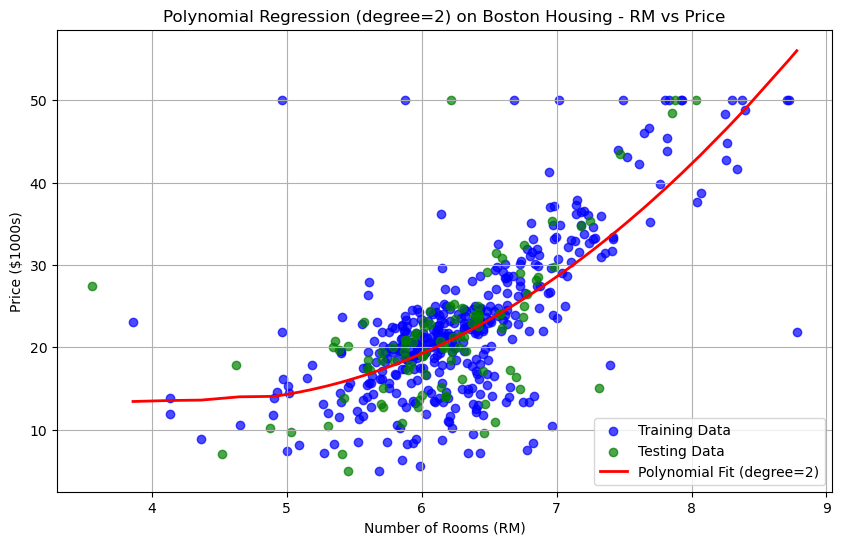

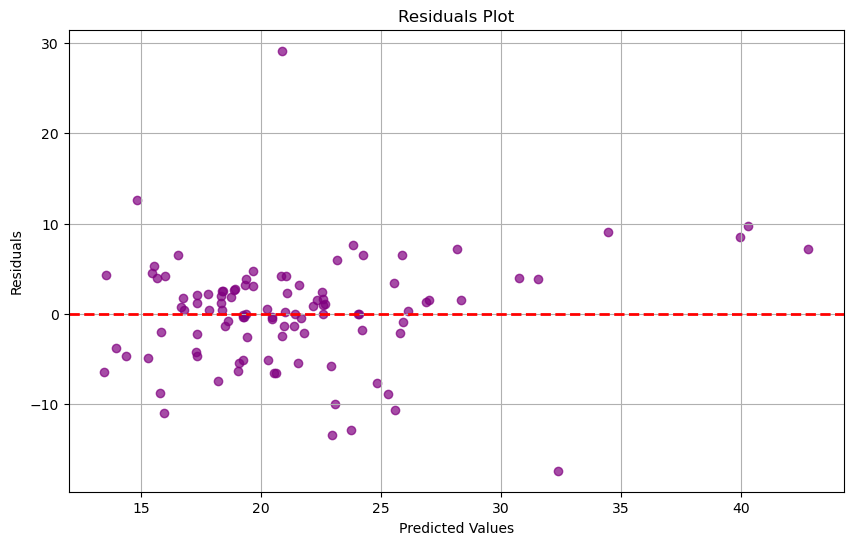

Training MSE: 38.91
Testing MSE: 35.37


In [ ]:
# Visualization: Actual values vs. Predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')  # Actual fuel efficiency
plt.ylabel('Predicted MPG')  # Predicted fuel efficiency
plt.title('Actual vs Predicted MPG')
plt.grid()
plt.show()